# Imports and Gdrive mount

In [ ]:
import os
import numpy as np
import pandas as pd
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Directories and files paths definitions:

In [ ]:
path_to_data_dir = 'drive/MyDrive/NLP_And_Social_Dynamics/Data/preprocessed_data' # change to your path to the data dire
interactions_df_name = 'joined_users_dataset.csv' # change to your file name (if different)

# Reading the joined dataset

In [ ]:
interactions_df_path = os.path.join(path_to_data_dir, interactions_df_name)
interactions_df = pd.read_csv(interactions_df_path)
interactions_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7,9,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tweet_id,userid_hash,user_screen_name_hash,final_profile_description,followers_mis,tweet_time,retweet_userid,in_reply_to_userid,account_type_mis,rt_atype,...,retweet,account_category,new_june_2018,alt_external_id,article_url,tco1_step1,tco2_step1,tco3_step1,target_id,target_type
0,552475834658086912,71db45e4783602194ced17d50c4070036dfc754e9557fe...,71db45e4783602194ced17d50c4070036dfc754e9557fe...,"Very outspoken, but don't take it for anger. x...",64.0,2015-01-06 14:44,NaN,NaN,LeftTroll,NaN,...,0,LeftTroll,0,1.652139e+09,http://twitter.com/acejinev/statuses/552475834...,NaN,NaN,NaN,not_inter,not_inter
1,552475784288690176,71db45e4783602194ced17d50c4070036dfc754e9557fe...,71db45e4783602194ced17d50c4070036dfc754e9557fe...,"Very outspoken, but don't take it for anger. x...",64.0,2015-01-06 14:44,NaN,NaN,LeftTroll,NaN,...,0,LeftTroll,0,1.652139e+09,http://twitter.com/acejinev/statuses/552475784...,NaN,NaN,NaN,not_inter,not_inter
2,552475721374121984,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,Fun-loving conservative sharing the truth that...,60.0,2015-01-06 14:44,NaN,NaN,RightTroll,NaN,...,0,RightTroll,0,1.629828e+09,http://twitter.com/cassishere/statuses/5524757...,NaN,NaN,NaN,not_inter,not_inter
3,552475758896353280,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,ef983249ef6ed5de427c4dc19ad6d966c6cf572c2505e4...,Fun-loving conservative sharing the truth that...,60.0,2015-01-06 14:44,NaN,NaN,RightTroll,NaN,...,0,RightTroll,0,1.629828e+09,http://twitter.com/cassishere/statuses/5524757...,NaN,NaN,NaN,not_inter,not_inter
4,552475998676348928,71db45e4783602194ced17d50c4070036dfc754e9557fe...,71db45e4783602194ced17d50c4070036dfc754e9557fe...,"Very outspoken, but don't take it for anger. x...",64.0,2015-01-06 14:45,NaN,NaN,LeftTroll,NaN,...,0,LeftTroll,0,1.652139e+09,http://twitter.com/acejinev/statuses/552475998...,NaN,NaN,NaN,not_inter,not_inter


# Data Exploration:

In [ ]:
f"Number of unique users in dataset: {len(set(list(interactions_df['userid_hash'].unique())+list(interactions_df['target_id'].unique())))}"

'Number of unique users in dataset: 43269'

In [ ]:
f"Columns in dataset: {interactions_df.columns}"

"Columns in dataset: Index(['tweet_id', 'userid_hash', 'user_screen_name_hash',\n       'final_profile_description', 'followers_mis', 'tweet_time',\n       'retweet_userid', 'in_reply_to_userid', 'account_type_mis', 'rt_atype',\n       'reply_atype', 'is_ext_retweet', 'is_ext_reply', 'harvested_date_mis',\n       'external_author_id', 'author', 'content', 'region', 'language',\n       'publish_date', 'harvested_date_ira', 'following', 'followers_ira',\n       'updates', 'post_type', 'account_type_ira', 'retweet',\n       'account_category', 'new_june_2018', 'alt_external_id', 'article_url',\n       'tco1_step1', 'tco2_step1', 'tco3_step1', 'target_id', 'target_type'],\n      dtype='object')"

## Get rows which are interactions

In [ ]:
interactions_df = interactions_df[interactions_df['target_type']!='not_inter']
cols = ['retweet_userid', 'in_reply_to_userid']
only_interactions_df = interactions_df[~interactions_df[cols].isnull().min(axis=1)]
only_interactions_df.head()

,tweet_id,userid_hash,user_screen_name_hash,final_profile_description,followers_mis,tweet_time,retweet_userid,in_reply_to_userid,account_type_mis,rt_atype,...,retweet,account_category,new_june_2018,alt_external_id,article_url,tco1_step1,tco2_step1,tco3_step1,target_id,target_type
502,556030482886844416,3f22ec97e6f7c68c28e59390710135dbfd067aa024eeb3...,3f22ec97e6f7c68c28e59390710135dbfd067aa024eeb3...,"A world for a few, a few to justice, lands in ...",98.0,2015-01-16 10:09,353e66426b732cbce1b0b7c5ca057d3c9c522cad1cdbcc...,NaN,LeftTroll,LeftTroll,...,1,LeftTroll,0,1.692501e+09,http://twitter.com/CornellBurchet/statuses/556...,NaN,NaN,NaN,353e66426b732cbce1b0b7c5ca057d3c9c522cad1cdbcc...,LeftTroll
523,556143108426313728,2742482932,cascaseyp,Do not let what you cannot do interfere with w...,2.0,2015-01-16 17:37,8da4056b67e1ff9b16609e078941e31f4f8234f062dda1...,NaN,HashtagGamer,Fearmonger,...,1,HashtagGamer,0,2.742483e+09,http://twitter.com/cascaseyp/statuses/55614310...,https://twitter.com/Goldie_Alf/status/55613099...,NaN,NaN,8da4056b67e1ff9b16609e078941e31f4f8234f062dda1...,Fearmonger
579,557440559439437824,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,8.0,2015-01-20 07:32,NaN,aa2d23906fee5e96183b638522032d61cf99f04b6c9d12...,HashtagGamer,NaN,...,0,HashtagGamer,0,2.732676e+09,http://twitter.com/BGarner2107/statuses/557440...,NaN,NaN,NaN,aa2d23906fee5e96183b638522032d61cf99f04b6c9d12...,Fearmonger
581,557441469888602112,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,8.0,2015-01-20 07:36,NaN,2537451658,HashtagGamer,NaN,...,0,HashtagGamer,0,2.732676e+09,http://twitter.com/BGarner2107/statuses/557441...,NaN,NaN,NaN,2537451658,NaN
584,557442571895832576,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,393955df00832382d3f4d8dbff2d7487fe723e1a560197...,embrace yourself,8.0,2015-01-20 07:40,NaN,2497132682,HashtagGamer,NaN,...,0,HashtagGamer,0,2.732676e+09,http://twitter.com/BGarner2107/statuses/557442...,NaN,NaN,NaN,2497132682,NaN


In [ ]:
only_interactions_df['target'] = only_interactions_df.apply(lambda x: x['retweet_userid'] if x['retweet_userid']==x['retweet_userid'] else x['in_reply_to_userid'], axis=1)
only_interactions_df['target_type'] = only_interactions_df.apply(lambda x: 'retweet' if x['retweet_userid']==x['retweet_userid'] else 'reply', axis=1)
only_interactions_df['account_type'] = only_interactions_df['account_category'].apply(lambda x: x if x==x and x!='' else 'unknown')


## number of unique users that initiated interactions:

In [ ]:
all_acc = set()
for index, row in only_interactions_df.iterrows():
  all_acc.add(row['userid_hash'])
print(f"Number of unique interacting users {len(all_acc)}")

Number of unique interacting users 182


## number of interactions for each unique user

In [ ]:
interactions = interactions_df.groupby(['userid_hash','target_id'])['tweet_id'].count()
interactions

userid_hash                                                       target_id                                                       
02fdbbce9f36a93ed8056e0a1b02a857a0bce32e7d96d01d021e91b51681d134  3177941678                                                          3
                                                                  330564612                                                           1
0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1109e2f654b1a9c5caf  0994abf9fb8fe1bf699d0e101e9603b30f369e94a0eec1109e2f654b1a9c5caf    1
                                                                  0e45d2af1bbca512ab1d8fa1c2216c038f9627bb773ab4cbe351404ee7a2c93e    1
                                                                  100638300                                                           7
                                                                                                                                     ..
fd1c978b6d412419d37b646d5f0ac359db4b38f4879b0eb9445ee

## created weightened (by number of interactions) interactions df

In [ ]:
interactions.reset_index().to_csv(os.path.join(path_to_data_dir, 'weighted_interactions.csv'))
interactions = interactions.reset_index()
only_interactions_df.to_csv(os.path.join(path_to_data_dir, 'part_uid_interactions.csv'))

In [ ]:
all_users_ids = np.vstack([only_interactions_df['target'].values, only_interactions_df['userid_hash'].values]).flatten()

## create a networkx graph from weightened interactions df

In [ ]:
trolls_network = nx.from_pandas_edgelist(interactions, source='userid_hash', target='target_id')

### get the users trolls types for each iteraction (for graph visualization)

In [ ]:
types = {}
for index, row in interactions_df.iterrows():
  types[row['target_id']] = {'user_type' : str(row['target_type'])}
  types[row['userid_hash']] = {'user_type': str(row['account_type_mis'])}

In [ ]:
import pickle

with open(os.path.join(path_to_data_dir,'labels.pickle'), 'wb') as handle:
    pickle.dump(types, handle, protocol=pickle.HIGHEST_PROTOCOL)

### set the nodes attributes

In [ ]:
trolls_type_attributes = {row['userid_hash']: {'user_type': row['account_type']} for _, row in only_interactions_df.iterrows()}
for _id in all_users_ids:
  if trolls_type_attributes.get(_id) is None:
    trolls_type_attributes[_id] = {'user_type': 'unknown'}
nx.set_node_attributes(trolls_network, trolls_type_attributes)


In [ ]:
nx.set_node_attributes(trolls_network, types)

### save graph as gml file (networkx supported format)

In [ ]:
nx.write_gml(trolls_network, path=os.path.join(path_to_data_dir, 'users_no_NaN.gml'))

## graph visualization

### filter and visualize only very interacting users (more than 10 interactions)

In [ ]:
to_keep = [n for n in trolls_network.nodes if trolls_network.degree[n]>10]
print(f"Number of highly interacting users {len(to_keep)}")
G = trolls_network.subgraph(to_keep)
color_map = {'RightTroll': 'red', 'HashtagGamer': 'green', 'LeftTroll': 'blue', 'Newsfeed':'pink', 'Fearmonger': 'grey', 'Unknown':'yellow', 'nan':'orange'}
color_mapping_by_attr = [color_map.get(G.nodes[node].get('user_type', 'bla'), 'black') for node in G.nodes]

Number of highly interacting users 822


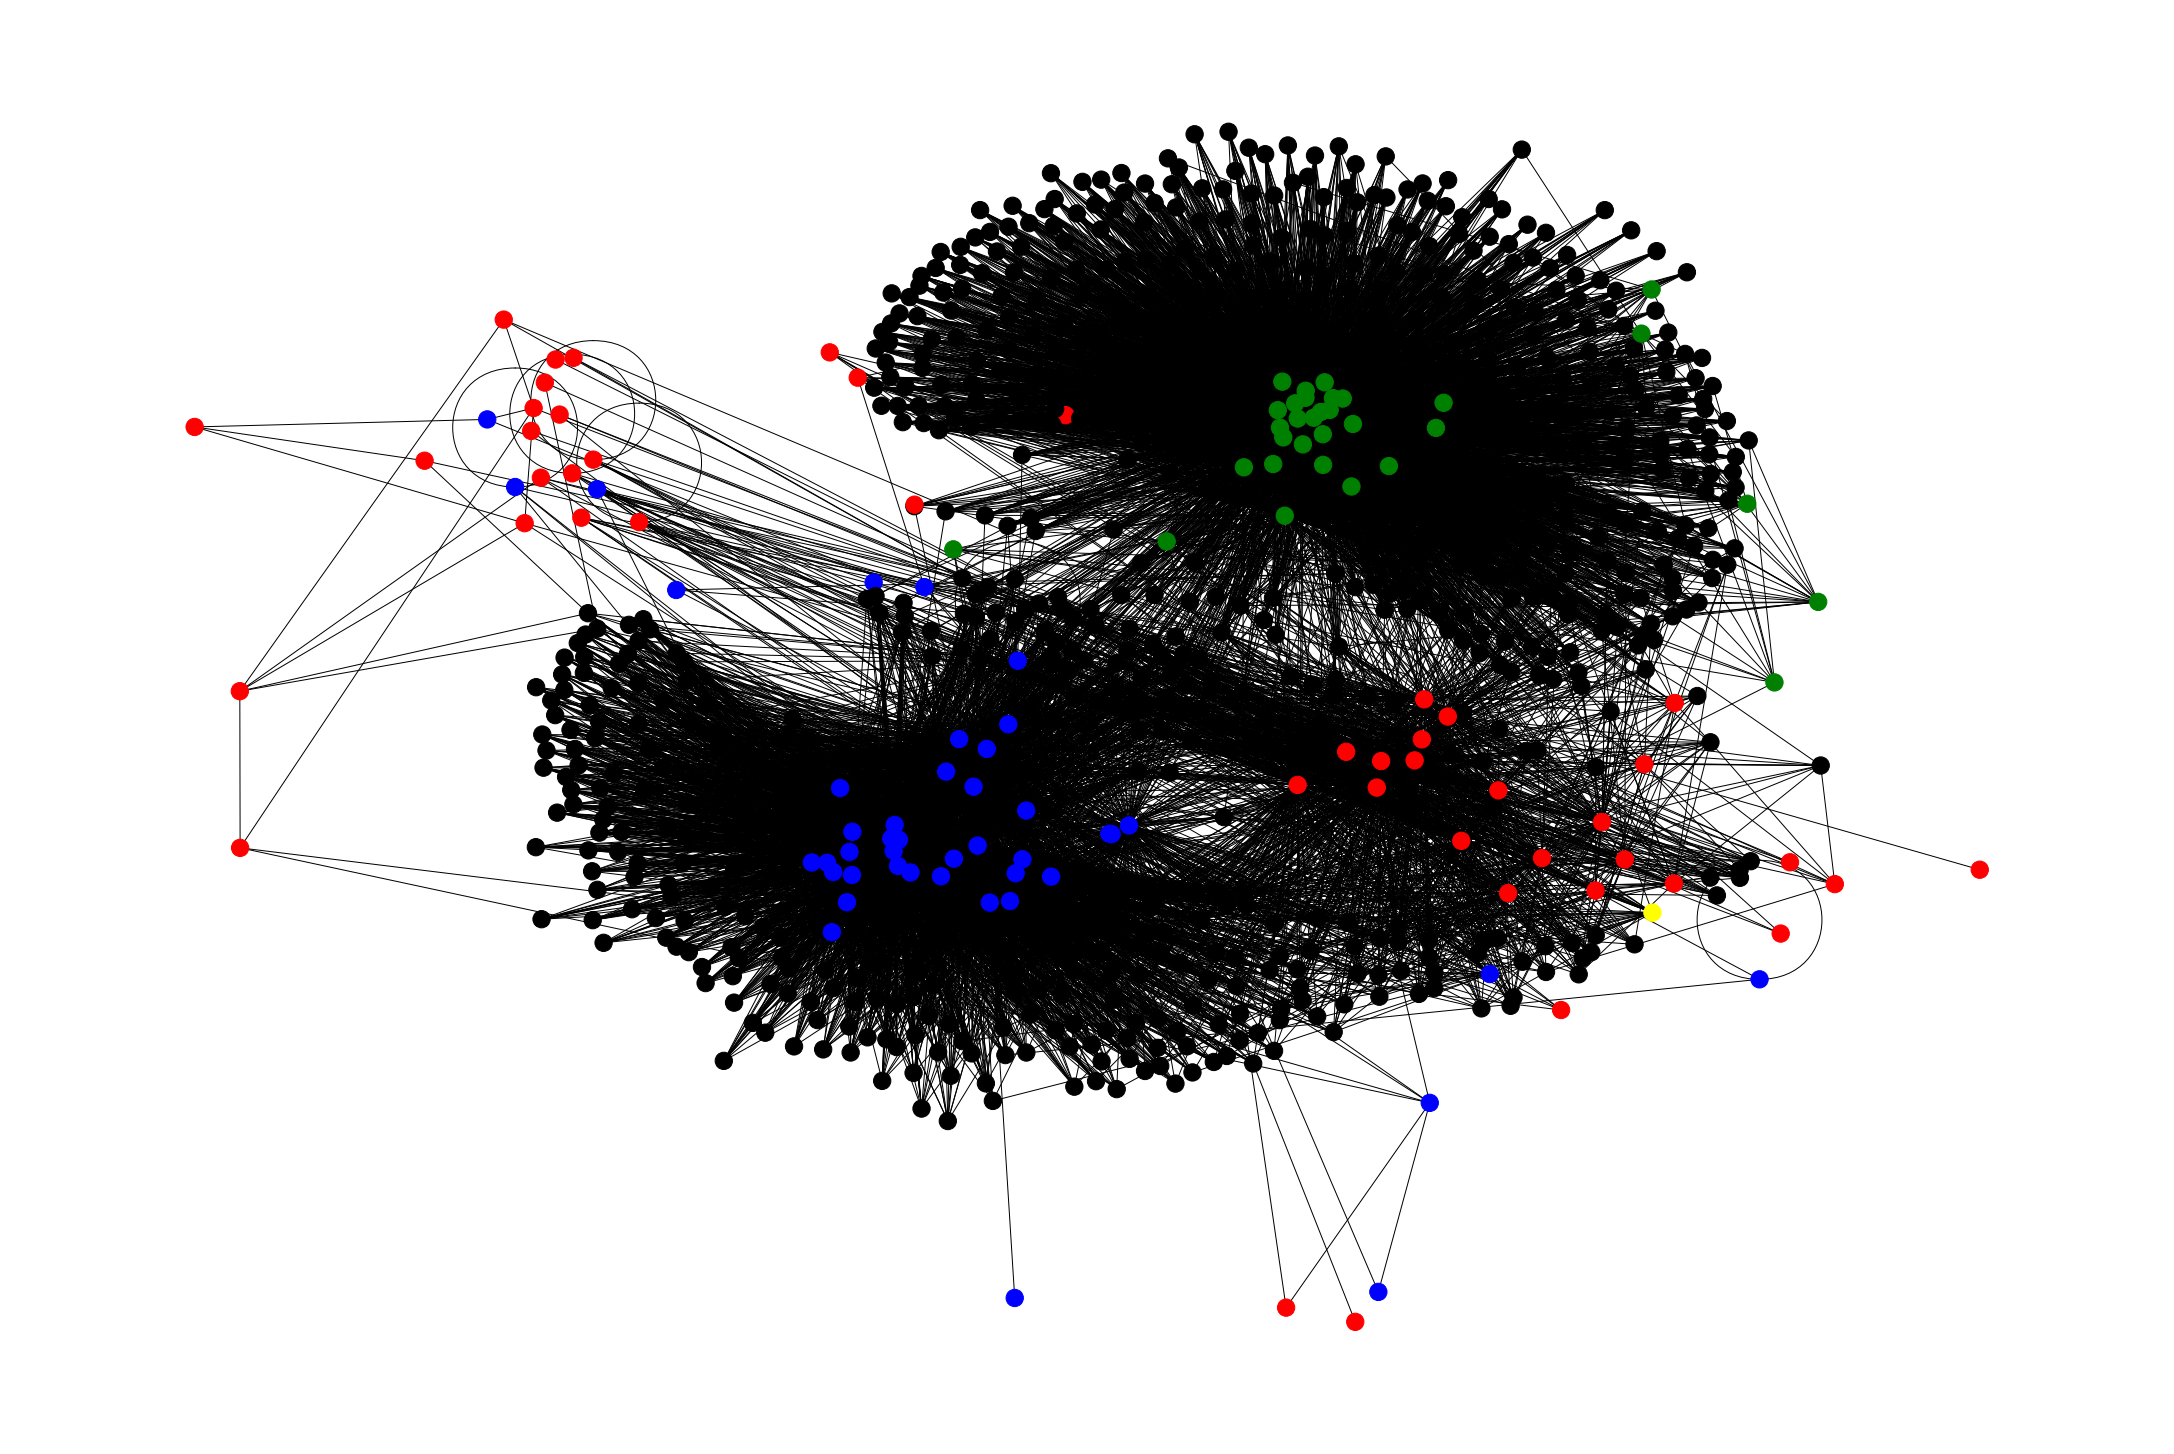

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,20))
nx.draw_kamada_kawai(G, node_color=color_mapping_by_attr)

### spring layout visualization (force directed) 

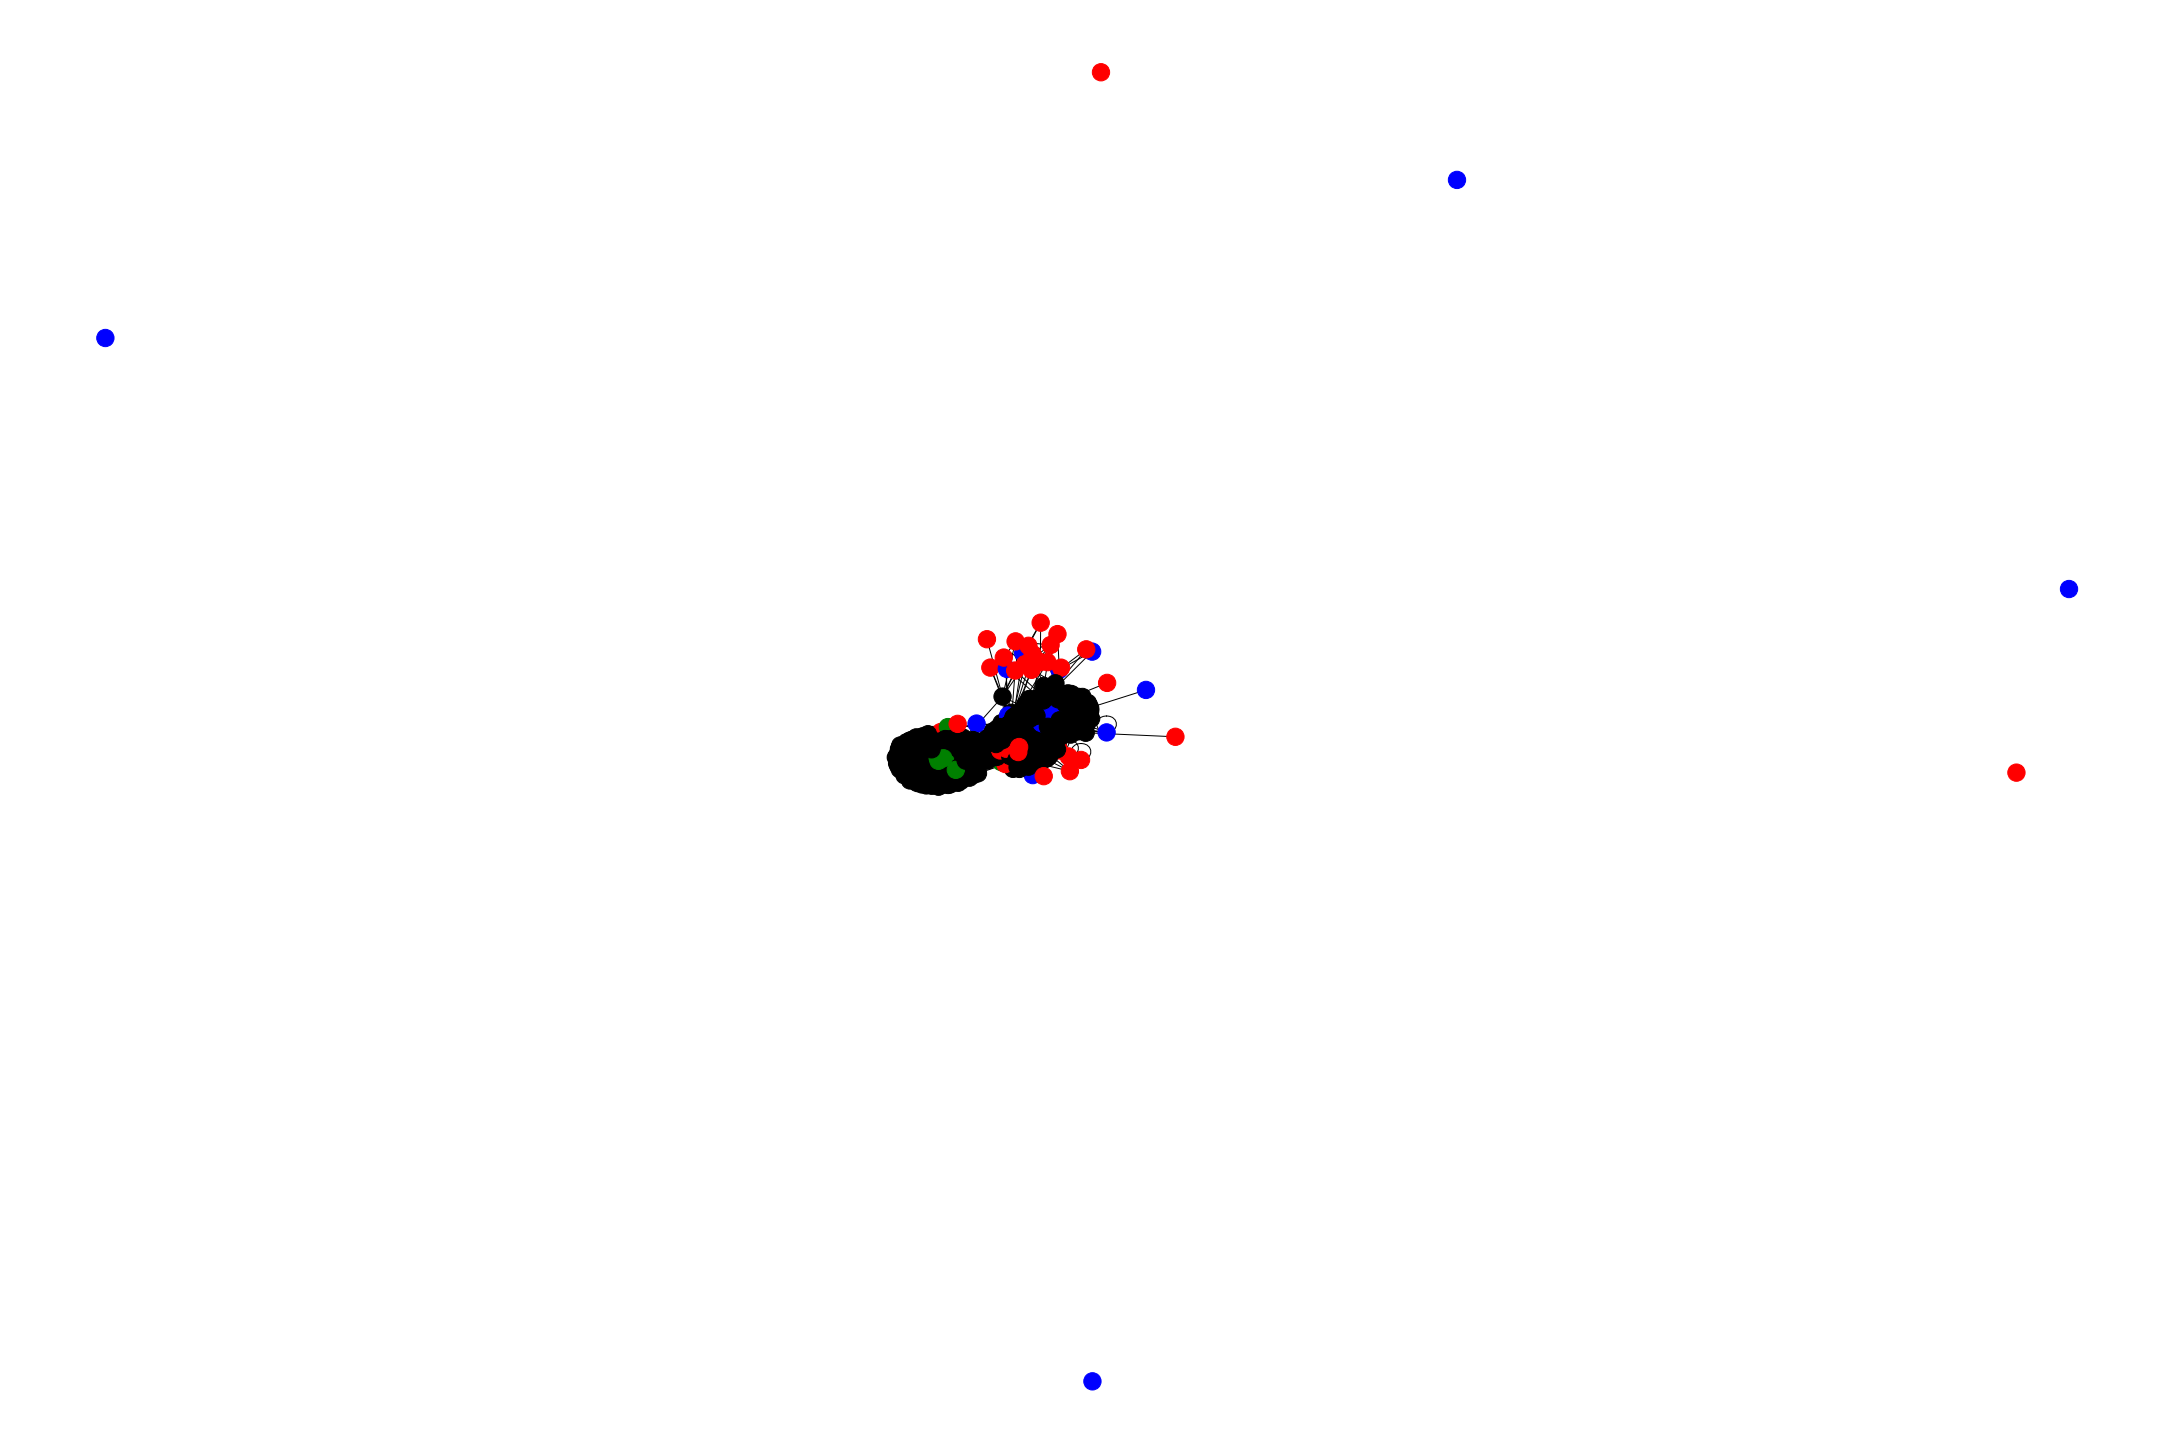

In [ ]:
plt.figure(figsize = (30,20))
color_mapping_by_attr = [color_map.get(G.nodes[node].get('user_type', 'bla'), 'black') for node in G.nodes]
nx.draw(G, pos=nx.spring_layout(G), node_color=color_mapping_by_attr)

## save the plots:

In [ ]:
path_to_plots_dir = '/content/drive/MyDrive/NLP_And_Social_Dynamics/plots' # change to your own directory
network_fig_fname = 'users_interactions_kamda_kawai.png' # change to your own file name (if you'd like)
path_to_network_fig = os.path.join(path_to_plots_dir, network_fig_fname)
plt.savefig(path_to_network_fig, dpi=300)

<Figure size 432x288 with 0 Axes>

# Preprocess data before ML pipeline

In [ ]:
path_to_data_dir = '/content/drive/MyDrive/NLP_And_Social_Dynamics/Data'
features_table_path = os.path.join(path_to_data_dir, '')

def preprocess_for_ml(df: Union[str, os.PathLike, pd.DataFrame], 
                      columns_to_drop: List[str] = ['description'], 
                      columns_to_normalize: List[str] = ['followers_count', 'statuses_count'],
                      columns_to_encode: List[str] = [], 
                      filter_na: bool=True, 
                      filter_unknowns: bool=True,
                      label_col_name: str = 'mode_account_type') -> np.ndarray:
  
  if isinstance(df, str) or isinstance(df, os.PathLike):
    df = pd.read_csv(df)
  else:
    df = df.copy()
  
  df = df.drop(columns=columns_to_drop)
  if filter_na:
    df = df.dropna()
  if filter_unknowns:
    df = df[df[label_col_name]!='UNKNOWN']
  
  for column in columns_to_normalize:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df_min_max_scaled[column].min()
  
  # for column in columns_to_encode: todo
  #   df[column] = (df[column] - df[column].min()) / (df[column].max() - df_min_max_scaled[column].min()

  return df

## Spacy and preprocessing package install

In [ ]:
!pip install spacy
!spacy download en_core_web_sm
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 12.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Preprocessing for ml

In [ ]:
import os
import shutil
from typing import *
import numpy as np
import pandas as pd
import spacy
from spacy.lang.en import stop_words as spacy_stopwords
import re
import preprocessor as p
import string

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/IRA_tweets/IRAhandle_tweets_1.csv")

In [ ]:
df['account_category'].value_counts()

RightTroll      118556
NonEnglish       53784
LeftTroll        36225
HashtagGamer     27349
NewsFeed         11334
Unknown            613
Fearmonger         384
Commercial         339
Name: account_category, dtype: int64

In [ ]:
df['account_type'].value_counts()

Right         118556
Russian        45705
Left           36225
Hashtager      27349
local          11334
Italian         6278
German          1302
?                613
Arabic           475
Koch             384
Commercial       339
French            22
Spanish            1
Ukranian           1
Name: account_type, dtype: int64

In [ ]:
df['retweet'].value_counts()

1    154980
0     93604
Name: retweet, dtype: int64

In [ ]:
df.head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN


In [ ]:
df.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'retweet', 'account_category',
       'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1'],
      dtype='object')

In [ ]:
df.describe()

In [ ]:
stop_words = spacy_stopwords.STOP_WORDS
punctuations = string.punctuation



def clean_text(text):
    text = p.clean(text)
    assert text is not None, f'Failed in cleaning'
    text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    assert text is not None, f'Failed in 1st sub'
    # replace numbers with the word 'number'
    text = re.sub(r"\d+", "number", text)
    assert text is not None, f'Failed in inserting number'
    text = text.lower()  # lower case everything

    return text.strip() # remove redundant spaces


def calc_dataframe_average_txt_embedding(data_org: pd.DataFrame, txt_colname: str = 'content', embedding_model = None, embeddings_cols_prefix='txt')->pd.DataFrame:
  if embedding_model is None:
    embedding_model = spacy.load('en_core_web_sm')
  
  data = data_org.copy()
  data = data.dropna(subset=[txt_colname])
  clean_txt = np.array([clean_text(row) for row in data[txt_colname].values])
  data.loc[:,f'clean_{embeddings_cols_prefix}'] = clean_txt

  embedding_matrix = np.vstack(np.array([embedding_model(row).vector for row in data[f'clean_{embeddings_cols_prefix}'].values]))
  data.loc[:, [f'{embeddings_cols_prefix}_embedding_{i}' for i in range(300)]] = embedding_matrix
  
  return data

In [ ]:
for fname in ('joined_users_dataset.csv',):
  print(f"processing {fname}")
  try:
    df = pd.read_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/preprocessed_data/{fname}')
    for col_ in ('final_profile_description', 'content'):
      print(f"processing {fname}, col: {col_}")
      try:
        df_with_content_embeddings = calc_dataframe_average_txt_embedding(df, txt_colname=col_, embeddings_cols_prefix=col_)
        df_with_content_embeddings.to_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/preprocessed_data/{fname}_{col_}_sm_embeddings.csv')
      except Exception as e:
        print(df.columns)
        print(e)
  except Exception as e:
        print(e)

processing joined_users_dataset.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7,9,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


processing joined_users_dataset.csv, col: final_profile_description


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Index(['tweet_id', 'userid_hash', 'user_screen_name_hash',
       'final_profile_description', 'followers_mis', 'tweet_time',
       'retweet_userid', 'in_reply_to_userid', 'account_type_mis', 'rt_atype',
       'reply_atype', 'is_ext_retweet', 'is_ext_reply', 'harvested_date_mis',
       'external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date_ira', 'following', 'followers_ira',
       'updates', 'post_type', 'account_type_ira', 'retweet',
       'account_category', 'new_june_2018', 'alt_external_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1', 'target_id', 'target_type'],
      dtype='object')
all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 96 and the array at index 28927 has size 0
processing joined_users_dataset.csv, col: content
Index(['tweet_id', 'userid_hash', 'user_screen_name_hash',
       'final_profile_description', 'followers_

In [ ]:
fname = 'joined_users_dataset.csv'
df = pd.read_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/preprocessed_data/{fname}')
df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7,9,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['tweet_id', 'userid_hash', 'user_screen_name_hash',
       'final_profile_description', 'followers_mis', 'tweet_time',
       'retweet_userid', 'in_reply_to_userid', 'account_type_mis', 'rt_atype',
       'reply_atype', 'is_ext_retweet', 'is_ext_reply', 'harvested_date_mis',
       'external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date_ira', 'following', 'followers_ira',
       'updates', 'post_type', 'account_type_ira', 'retweet',
       'account_category', 'new_june_2018', 'alt_external_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1', 'target_id', 'target_type'],
      dtype='object')

In [ ]:
fname = 'rel_misinfo_noNans.csv'
df = pd.read_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/{fname}')

In [ ]:
# calc_dataframe_average_txt_embedding(df.loc[:100, :])
df.columns

Index(['tweet_id', 'userid_hash', 'user_screen_name_hash',
       'final_profile_description', 'followers', 'tweet_time',
       'retweet_userid', 'in_reply_to_userid', 'account_type', 'rt_atype',
       'reply_atype', 'is_ext_retweet', 'is_ext_reply', 'harvested_date'],
      dtype='object')

In [ ]:
# any(df['content'].isna())
embeddings_cols_prefix = 'final_profile_description'
df_with_content_embeddings = calc_dataframe_average_txt_embedding(df, txt_colname='final_profile_description', embeddings_cols_prefix=embeddings_cols_prefix)

In [ ]:
fname = '.csv'
df = pd.read_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/{fname}')

In [ ]:
embeddings_cols_prefix = 'content'
df_with_content_embeddings = calc_dataframe_average_txt_embedding(df, txt_colname=embeddings_cols_prefix, embeddings_cols_prefix=embeddings_cols_prefix)
df_with_content_embeddings.to_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/{fname}_{embeddings_cols_prefix}_embeddings.csv')

In [ ]:
df_with_content_embeddings.to_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/{fname}_{embeddings_cols_prefix}_embeddings.csv')

In [ ]:
df_with_content_embeddings.to_csv(f'/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/{fname}_{embeddings_cols_prefix}_embeddings.csv')

In [ ]:
def generate_df_file_embeddings_file(df_path: Union[str, os.PathLike]) -> None:
  df_dir = os.path.join(*df_path.split(os.sep)[:-1])
  org_df_name = df_path.split(os.sep)[-1]
  new_df_name = org_df_name.replace('.csv', f'_with_txt_embeddings.csv')
  new_df_path = os.path.join(os.sep, df_dir, new_df_name)
  df = pd.read_csv(df_path)
  df_with_embedding = calc_dataframe_average_txt_embedding(data_org=df)
  df_with_embedding.to_csv(new_df_path, index=False)


In [ ]:
MAIN_DF_PATH_DIR = '/content/drive/MyDrive/NLP_And_Social_Dynamics/Data/IRA_tweets'
files_paths_to_process = list(filter(lambda x: x.endswith('.csv'), os.listdir(MAIN_DF_PATH_DIR)))
[generate_df_file_embeddings_file(os.path.join(MAIN_DF_PATH_DIR, f_path)) for f_path in files_paths_to_process]

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Softmax
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.regularizers import L1, L2, L1L2


def get_tf_model(input_size: int, output_size: int, n_layers: int = 4):
  model = Sequential()
  model.add(Input(shape=(input_size,), activation="relu", name='input_layer'))
  prev_layer_size = input_size
  for i in range(1, n_layers + 1):
    l_size = prev_layer_size//2
    model.add(Dense(shape=(l_size,), activation="relu", name=f'{i}_layer'))
    prev_layer_size = l_size 
  model.add(Softmax(shape=(output_size, ), activation="relu", name='input_layer'))

  model.compile(
                  optimizer=RMSprop,
                  loss=CategoricalCrossentropy,
                  metrics=['accuracy', 'recall', 'precision']
                )
  return model
  

def prepare_output_for_softmax(output_label: str, map:Dict):
  output_arr = np.zeros((len(map.keys())))
  output_arr[map[output_label]] = 1.
  return output_arr

def convert_output_from_softmax(output_softmax_arr: str, map:Dict):
  return map[np.argmax(output_softmax_arr)]


def prepare_troll_and_users_features_input(troll_features: np.array, unknown_users_features: np.array, strategy: str = 'concat'):
  """
  assumes troll_features.shape == unknown_users_features.shape
  """
  if strategy == 'concat':
    return np.concatenate((troll_features, unknown_users_features), axis=None)
  if strategy == 'subtract':
    return np.subtract(troll_features, unknown_users_features)


def train_unknown_given_troll_model(#model_type: str = '', 
                                    train_df: pd.DataFrame,
                                    troll_features_cols: List[str], 
                                    unknown_user_features_cols: List[str], 
                                    target_col: str):
  """
  assumes df structure isomorphic (order does not matter, and could be other columns):
    troll_feature_1, ..., torll_feature_n, user_feature_1, ..., user_feature_n, target_col
  
  target_col values can be {'RightTroll', 'LeftTroll', 'HashtagGamer', 'NewsTroll', 'NotATroll'}.
  assumes all features values are preprocessed excluding target col.
  """
  # if model_type == 'numeric': # for continuous numeric predictions
  #   # todo: convert target col to numeric labels
  # else: 
  #   # todo: 
  train_data_troll_features = train_df.loc[:, troll_features_cols].values
  train_data_unknown_user_features = train_df.loc[:, unknown_user_features_cols].values
  train_data_x = np.vstack([prepare_troll_and_users_features_input(troll, ukn_user) for troll, ukn_user in zip(train_data_troll_features, train_data_unknown_user_features)])
  train_data_y = np.vstack([prepare_output_for_softmax(x) for x in train_df.loc[:, target_col].values])
  model = get_tf_model(input_size=train_data_x.shape[1], output_size=train_data_y.shape[1])

  model.fit(
      x=train_data_x,
      y=train_data_y,
      batch_size=8,
      epochs=10,
      verbose=1,
      # callbacks=None,
      # validation_split=0.0,
      # validation_data=None,
      # shuffle=True,
      # class_weight=None,
      # sample_weight=None,
      # initial_epoch=0,
      # steps_per_epoch=None,
      # validation_steps=None,
      # validation_batch_size=None,
      # validation_freq=1,
      # max_queue_size=10,
      # workers=1,
      # use_multiprocessing=False
  )  
  return model
  

def classify_unknown_given_troll(model, troll_features, unknown_user_features, numeric_to_str_map: Dict = None):
  prediction = model.predict(prepare_troll_and_users_features_input(troll_features, unknown_user_features))
  return convert_output_from_softmax(prediction, numeric_to_str_map)
